In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg



 ## Example 2 
 
 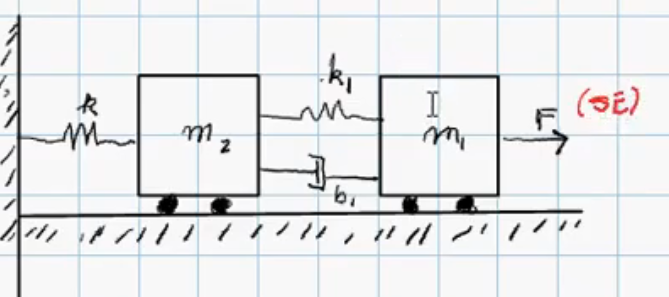

#We create the components of the bondgraph model (nodes, ports and edges)

In [2]:
model2 = bg.BondGraph(Name ='Serial 2 mass connection with 2 springs and one demper and ground connection + external force')

#Create some elements
SE_2 = bg.BGelement('SE', Position=[0,3])
SF_2 = bg.BGelement('SF', Position=[2,1])

C_2 = bg.BGelement('C', Position=[3,6])
C_3 = bg.BGelement('C', Position=[3,5])
R_2 = bg.BGelement('R', Position=[3,4])
I_2 = bg.BGelement('I', Position=[0,3])
I_3 = bg.BGelement('I', Position=[0,4])

OneJ_4 = bg.BGelement('1', Position=[0,1])
OneJ_5 = bg.BGelement('1', Position=[2,1])
OneJ_6 = bg.BGelement('1', Position=[2,0])
OneJ_7 = bg.BGelement('1', Position=[0,1])
OneJ_8 = bg.BGelement('1', Position=[1,1])


ZeroJ_2 = bg.BGelement('0', Position=[2,2])
ZeroJ_3 = bg.BGelement('0', Position=[4,2])

# Add the created elements to the model
model2.addElement(OneJ_4)
model2.addElement(OneJ_5)
model2.addElement(OneJ_6)
model2.addElement(OneJ_7)
model2.addElement(OneJ_8)

model2.addElement(ZeroJ_2)
model2.addElement(ZeroJ_3)

model2.addElement(C_2)
model2.addElement(C_3)
model2.addElement(R_2)
model2.addElement(I_2)
model2.addElement(I_3)
model2.addElement(SE_2)
model2.addElement(SF_2)

# add a connections between elements in model
model2.connect(SE_2, OneJ_4)
model2.connect(I_2, OneJ_4)
model2.connect(OneJ_4, ZeroJ_2)
model2.connect(ZeroJ_2, OneJ_5)
model2.connect(ZeroJ_2, OneJ_6)
model2.connect(C_2, OneJ_6)
model2.connect(R_2, OneJ_6)
model2.connect(OneJ_5, I_3)
model2.connect(OneJ_5, ZeroJ_3)
model2.connect(OneJ_7, ZeroJ_3)
model2.connect(C_3, OneJ_7)

model2.connect(OneJ_8, ZeroJ_3)
model2.connect(OneJ_8, SF_2)

In [3]:

# Set positions automatically for drawing (automatically done, but not ideally)
model2.render()


In [4]:
OneJ_8.setPosition([7,2])
OneJ_6.setPosition([0,2])
R_2.setPosition([-1,2])
C_2.setPosition([-1,3])
SE_2.setPosition([-1,-1])
C_3.setPosition([4,-1])
I_2.setPosition([1,0])
I_3.setPosition([0,4])

In [5]:
#we can get the position of element on the picture
OneJ_5.getPosition()

[1, 3]

In [18]:
model2.applyRules()

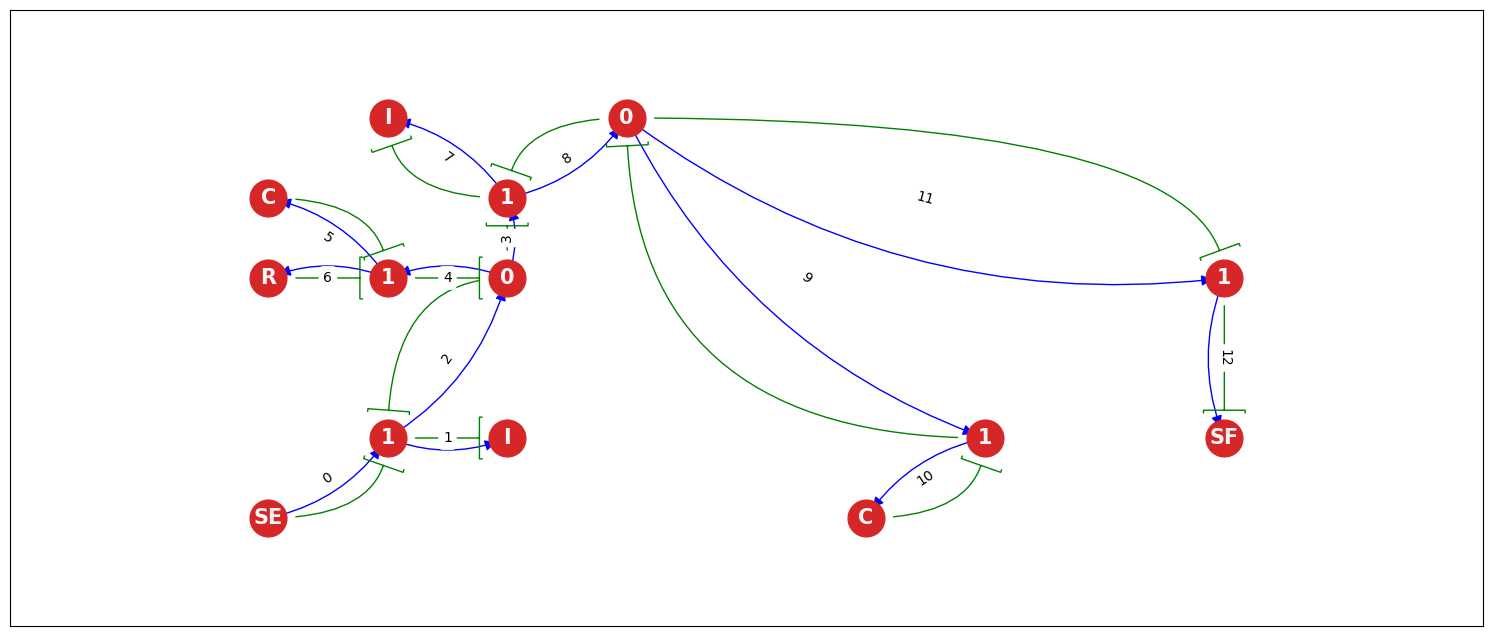

In [19]:
model2.draw()

In [20]:
bg.show_ports_state(model2)

Element name:  1_7
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 4 |  arrow:  Output |  causality:  Causal
Element name:  1_8
++ port_id: 7 |  arrow:  Input |  causality:  Causal
++ port_id: 14 |  arrow:  Output |  causality:  Uncausal
++ port_id: 16 |  arrow:  Output |  causality:  Causal
Element name:  1_9
++ port_id: 9 |  arrow:  Input |  causality:  Uncausal
++ port_id: 11 |  arrow:  Output |  causality:  Causal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  1_10
++ port_id: 18 |  arrow:  Input |  causality:  Uncausal
++ port_id: 21 |  arrow:  Output |  causality:  Causal
Element name:  1_11
++ port_id: 22 |  arrow:  Input |  causality:  Causal
++ port_id: 24 |  arrow:  Output |  causality:  Uncausal
Element name:  0_12
++ port_id: 5 |  arrow:  Input |  causality:  Uncausal
++ port_id: 6 |  arrow:  Output |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Causal
Ele

In [21]:
model2.assign_equations()
equastions = model2.get_model_equations()

assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 7 5 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 7 12 , type:  1 0 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 12 8 , type:  0 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 12 9 , type:  0 1 -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 9 2 , type:  1 C -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 9 4 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 8 6 , type:  1 I -----------------------
Express: not found the variable, inverse var

In [22]:
equastions

['+e0=+SE0',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I5*p5',
 '+e2=+e3=+e4',
 '+f0=+f1=+f2',
 '+e3=+e7+e8',
 '+f3=+f7=+f8',
 '+e4=+e5+e6',
 '+f4=+f2-f3',
 '+e5=+1/C2*q2',
 '+f4=+f5=+f6',
 '+e6=+R4*f6',
 '+f4=+f5=+f6',
 '+e7=+e3-e8',
 '+f7=+1/I6*p6',
 '+e8=+e9=+e11',
 '+f3=+f7=+f8',
 '+e9=+e10',
 '+f9=+f8-f11',
 '+e10=+1/C3*q3',
 '+f9=+f10',
 '+e11=+e12',
 '+f11=+f12',
 '+e12=+e11',
 '+f12=+SF1']

In [23]:
cauchy_state_equastions, variables_exp = model2.cauchy_form_equastions_sequence()
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print(cauchy_state_equastions, model2.state_variables)

assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 7 5 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 7 12 , type:  1 0 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 12 8 , type:  0 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 12 9 , type:  0 1 -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 9 2 , type:  1 C -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 9 4 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 8 6 , type:  1 I -----------------------
Express: not found the variable, inverse var

In [25]:
model2.make_state_statespace(cauchy_state_equastions)


component: p5/I5 args= (p5, 1/I5) --------------
component: -p6/I6 args= (-1, p6, 1/I6) --------------
component: -SF1 args= (-1, SF1) --------------
component: p6/I6 args= (p6, 1/I6) --------------
component: SE0 args= () --------------
component: -q2/C2 args= (-1, q2, 1/C2) --------------
component: R4*p6/I6 args= (R4, p6, 1/I6) --------------
component: -R4*p5/I5 args= (-1, R4, p5, 1/I5) --------------
component: q2/C2 args= (q2, 1/C2) --------------
component: -q3/C3 args= (-1, q3, 1/C3) --------------
component: R4*p5/I5 args= (R4, p5, 1/I5) --------------
component: -R4*p6/I6 args= (-1, R4, p6, 1/I6) --------------
dummy_matrix= Matrix([[0, 0, 1/I5, -1/I6], [0, 0, 0, 1/I6], [-1/C2, 0, -R4/I5, R4/I6], [1/C2, -1/C3, R4/I5, -R4/I6]])
component: p5/I5 args= (p5, 1/I5) --------------
component: -p6/I6 args= (-1, p6, 1/I6) --------------
component: -SF1 args= (-1, SF1) --------------
component: p6/I6 args= (p6, 1/I6) --------------
component: SE0 args= () --------------
component: -q2/

In [26]:
model2.get_matrix_A()

Matrix([
[    0,     0,   1/I5,  -1/I6],
[    0,     0,      0,   1/I6],
[-1/C2,     0, -R4/I5,  R4/I6],
[ 1/C2, -1/C3,  R4/I5, -R4/I6]])

In [27]:
model2.get_matrix_B()

Matrix([
[0,  0],
[0, -1],
[1,  0],
[0,  0]])

In [30]:
# Enter for example 
cauchy_form_output_eq = model2.cauchy_form_output_eq(variables_exp, 'e7,f7')
model2.make_output_statespace(cauchy_form_output_eq)

Input the names of output variables:
It mast be in list eff_flows:  [f3, e7, f5, f8, f6, e1, e4, f10, e6, f9, f1, f2, f4, e12, e2, e5, f11, f0, e3, e11, f7, e9, f12, e0, e8, e10] (Velocity of Force at some point)
U entered this:  ['e7', 'f7']
output variable=  e7
first match [e3 - e8]
next iteration with expression: e2 - e9
next iteration with expression: -e10 + e4
next iteration with expression: e5 + e6 - q3/C3
next iteration with expression: R4*f6 - q3/C3 + q2/C2
next iteration with expression: R4*f4 - q3/C3 + q2/C2
next iteration with expression: R4*(f2 - f3) - q3/C3 + q2/C2
next iteration with expression: R4*(f0 - f7) - q3/C3 + q2/C2
next iteration with expression: R4*(f1 - p6/I6) - q3/C3 + q2/C2
next iteration with expression: R4*(-p6/I6 + p5/I5) - q3/C3 + q2/C2
output variable=  f7
first match [p6/I6]
component: q2/C2 args= (q2, 1/C2) --------------
component: -q3/C3 args= (-1, q3, 1/C3) --------------
component: R4*p5/I5 args= (R4, p5, 1/I5) --------------
component: -R4*p6/I6 a

In [31]:
model2.get_matrix_C()

Matrix([
[    0,     0,   1/I5,  -1/I6],
[    0,     0,      0,   1/I6],
[-1/C2,     0, -R4/I5,  R4/I6],
[ 1/C2, -1/C3,  R4/I5, -R4/I6]])

In [32]:
model2.get_matrix_D()

Matrix([
[0,  0],
[0, -1],
[1,  0],
[0,  0]])

In [34]:
model2.state_variables

[q2, q3, p5, p6]

In [35]:
print('List of system parameters:', model2.parameter_variables)
parameters_list = model2.parameter_variables

List of system parameters: [C2, C3, R4, I5, I6]


In [36]:
parameters_values = [10, 2, 20, 30, 4]

In [37]:
# initial state
initial_state = np.zeros((len(model2.state_variables), 1))
print("initial_state: ", initial_state)
time_steps=400
sampling_period = 0.5
input_sequence = np.ones((time_steps, len(model2.input_variables)))
# print("input_sequence: ", input_sequence)

initial_state:  [[0.]
 [0.]
 [0.]
 [0.]]


In [40]:
# initial state
initial_state = np.zeros((len(model2.state_variables), 1))
print("initial_state: ", initial_state)
time_steps=400
sampling_period = 0.5
input_sequence = np.ones((time_steps, len(model2.input_variables)))
# print("input_sequence: ", input_sequence)

initial_state:  [[0.]
 [0.]
 [0.]
 [0.]]


<class 'numpy.ndarray'> (4, 4) <class 'numpy.ndarray'> (4, 2)


Text(0.5, 1.0, 'System step response')

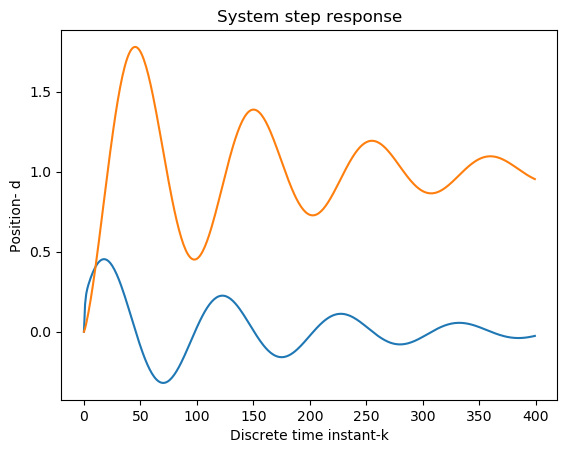

In [41]:
state, output = model2.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)     

plt.plot(output[0,:-1])
plt.plot(output[1,:-1])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')